In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



#  Camera model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Weight Based Model/OutputWGHTrain/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Weight Based Model/OutputWGHTest/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Weight Based Model/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Weight Based Model/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape


# Model 1(camera)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
#output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)


# for camera model
dense_camera=Dense(8,activation='softmax')(dense1)
output_camera = dense_camera

# camera model

model_camera = Model(inputs= inp1, outputs = output_camera)
model_camera.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history= model_camera.fit(X1_train,Y1_train, batch_size=128,epochs=15,validation_data=(X1_test,Y1_test))



Epoch 1/15
16/16 [==============================] - 32s 2s/step - loss: 2.0789 - accuracy: 0.1210 - val_loss: 2.0774 - val_accuracy: 0.1500
Epoch 2/15
16/16 [==============================] - 30s 2s/step - loss: 2.0728 - accuracy: 0.1625 - val_loss: 2.0765 - val_accuracy: 0.1325
Epoch 3/15
16/16 [==============================] - 26s 2s/step - loss: 2.0728 - accuracy: 0.1277 - val_loss: 2.0788 - val_accuracy: 0.1200
Epoch 4/15
16/16 [==============================] - 25s 2s/step - loss: 2.0691 - accuracy: 0.1383 - val_loss: 2.0709 - val_accuracy: 0.1400
Epoch 5/15
16/16 [==============================] - 28s 2s/step - loss: 2.0486 - accuracy: 0.1629 - val_loss: 2.0720 - val_accuracy: 0.1625
Epoch 6/15
16/16 [==============================] - 25s 2s/step - loss: 2.0183 - accuracy: 0.1993 - val_loss: 2.0006 - val_accuracy: 0.1925
Epoch 7/15
16/16 [==============================] - 25s 2s/step - loss: 1.9230 - accuracy: 0.2760 - val_loss: 1.7962 - val_accuracy: 0.3425
Epoch 8/15
16/16 [==

In [2]:

#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_camera.evaluate(X1_test,Y1_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

4/4 [==============================] - 1s 320ms/step - loss: 1.3601 - accuracy: 0.4850
[INFO] Accuracy: 48.50%
[INFO] Loss: 1.3601170778274536
Time:  0:00:01.482594


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


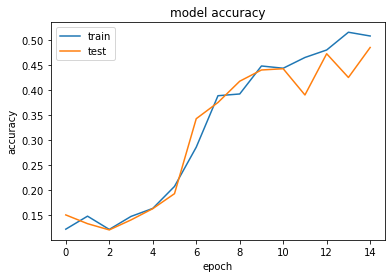

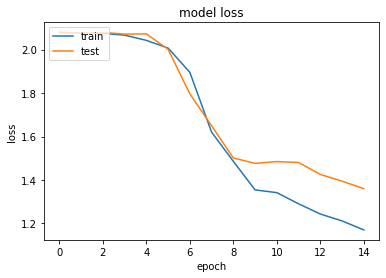

In [3]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Input image: table_specs_WGH35.jpg

probality of chair_bottle:  10.816258192062378

probality of plate_bottle:  1.6634609550237656

probality of spectacle_laptop:  12.169353663921356

probality of table_bottle:  4.438583552837372

probality of table_chair:  11.155358701944351

probality of table_laptop:  28.23677659034729

probality of table_plate:  10.61655655503273

probality of table_spectacle:  20.903654396533966


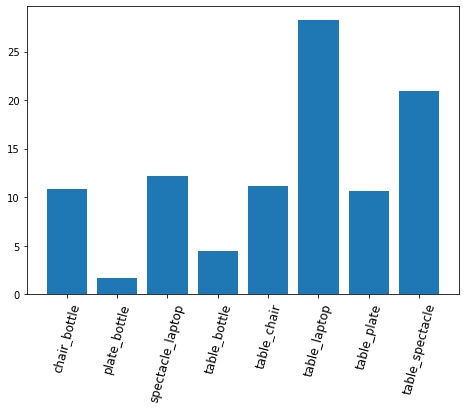

__________________________________________________________________
Input image: table_laptop_WGH17.jpg

probality of chair_bottle:  0.021572191326413304

probality of plate_bottle:  0.0012765258361469023

probality of spectacle_laptop:  16.729627549648285

probality of table_bottle:  0.00029988032110850327

probality of table_chair:  5.531744658946991

probality of table_laptop:  35.45356094837189

probality of table_plate:  36.05181872844696

probality of table_spectacle:  6.210102140903473


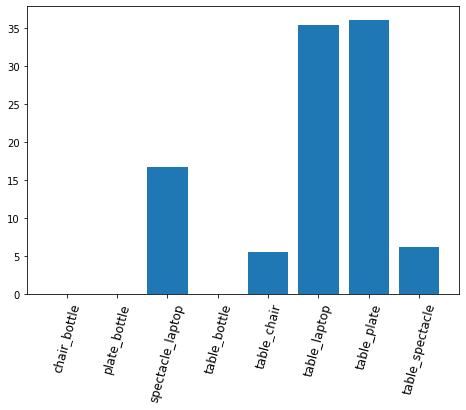

__________________________________________________________________
Input image: table_plate_WGH3.jpg

probality of chair_bottle:  0.10862724157050252

probality of plate_bottle:  0.003298789306427352

probality of spectacle_laptop:  6.847821921110153

probality of table_bottle:  4.2984504252672195

probality of table_chair:  56.84055685997009

probality of table_laptop:  13.114085793495178

probality of table_plate:  0.6367236841470003

probality of table_spectacle:  18.150438368320465


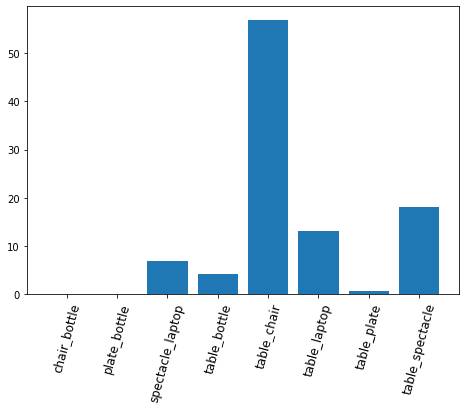

__________________________________________________________________
Input image: table_bottle_WGH8.jpg

probality of chair_bottle:  5.941594019532204

probality of plate_bottle:  0.5647212266921997

probality of spectacle_laptop:  0.6245299242436886

probality of table_bottle:  89.8353636264801

probality of table_chair:  1.3556250371038914

probality of table_laptop:  0.876905769109726

probality of table_plate:  0.04151732719037682

probality of table_spectacle:  0.7597466465085745


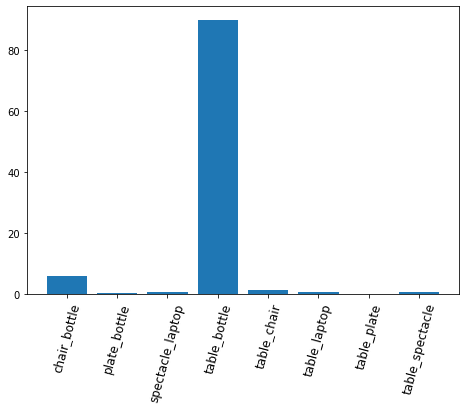

__________________________________________________________________
Input image: chair_bottle_WGH1.jpg

probality of chair_bottle:  29.473990201950073

probality of plate_bottle:  11.84753105044365

probality of spectacle_laptop:  0.39590317755937576

probality of table_bottle:  57.77823328971863

probality of table_chair:  0.30095656402409077

probality of table_laptop:  0.08932180935516953

probality of table_plate:  0.0013981851225253195

probality of table_spectacle:  0.11266804067417979


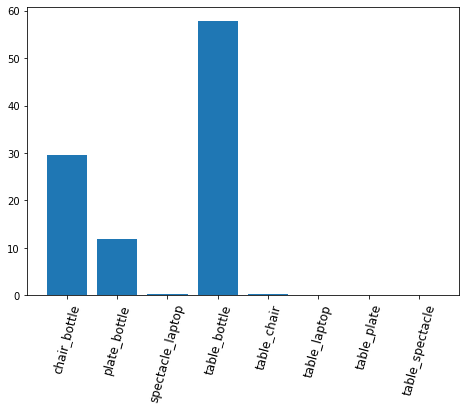

__________________________________________________________________
Input image: table_chair_WGH0.jpg

probality of chair_bottle:  4.56157959997654

probality of plate_bottle:  0.614797743037343

probality of spectacle_laptop:  24.485449492931366

probality of table_bottle:  23.46201390028

probality of table_chair:  23.375418782234192

probality of table_laptop:  17.77116358280182

probality of table_plate:  2.206769213080406

probality of table_spectacle:  3.522810712456703


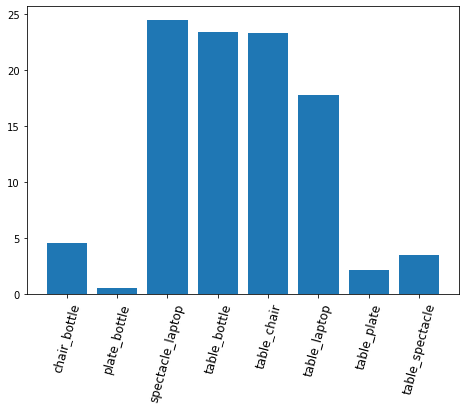

__________________________________________________________________
Input image: plate_bottle_WGH15.jpg

probality of chair_bottle:  22.06186056137085

probality of plate_bottle:  76.56199932098389

probality of spectacle_laptop:  0.7609241642057896

probality of table_bottle:  0.46134297735989094

probality of table_chair:  0.08487860905006528

probality of table_laptop:  0.03718454681802541

probality of table_plate:  0.00197569934243802

probality of table_spectacle:  0.02983299200423062


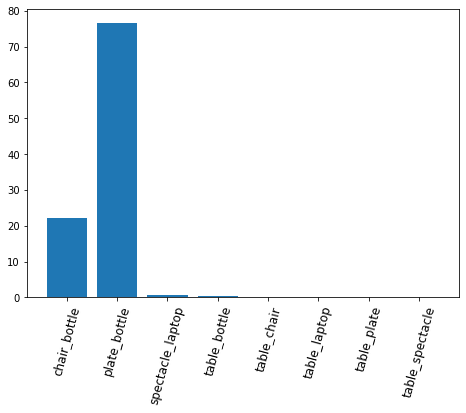

__________________________________________________________________
Input image: specs_laptop_WGH29.jpg

probality of chair_bottle:  0.4553946200758219

probality of plate_bottle:  0.09366011363454163

probality of spectacle_laptop:  31.561055779457092

probality of table_bottle:  0.01710217766230926

probality of table_chair:  6.1605483293533325

probality of table_laptop:  29.28340435028076

probality of table_plate:  29.714468121528625

probality of table_spectacle:  2.7143677696585655


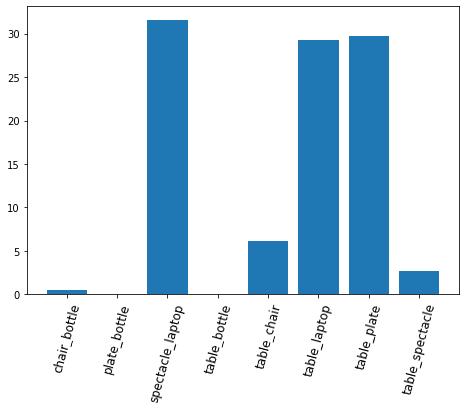

__________________________________________________________________


In [8]:
# make a prediction for a new thermal image.

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ListPic = {'chair_bottle_WGH1.jpg','plate_bottle_WGH15.jpg','specs_laptop_WGH29.jpg','table_bottle_WGH8.jpg',
          'table_chair_WGH0.jpg','table_laptop_WGH17.jpg','table_plate_WGH3.jpg','table_specs_WGH35.jpg'}



for item in ListPic:
 # load the image thermal
 img1 = load_img(item, target_size=(32, 32))

 # convert to array
 img1 = img_to_array(img1)

 # reshape into a single sample with 3 channels
 img1 = img1.reshape(1,32, 32, 3)

 # prepare pixel data
 img1 = img1.astype('float32')
 img1 = img1 / 255.0

 # prediction od data
 result = model_camera.predict(img1)
 
 print('Input image:',item)
 #print(result)
 print('')
 Bed = result[0][0]*100
 print("probality of chair_bottle: ", Bed)
 print()
 Bottle = result[0][1]*100
 print("probality of plate_bottle: ", Bottle)
 print()
 Chair = result[0][2]*100
 print("probality of spectacle_laptop: ", result[0][2]*100)
 print()
 Laptop = result[0][3]*100
 print("probality of table_bottle: ", result[0][3]*100)
 print()
 Plate = result[0][4]*100
 print("probality of table_chair: ", result[0][4]*100)
 print()
 Sofa = result[0][5]*100   
 print("probality of table_laptop: ", result[0][5]*100)
 print()
 Spectacle = result[0][6]*100
 print("probality of table_plate: ", result[0][6]*100)
 print()
 Table = result[0][7]*100   
 print("probality of table_spectacle: ", result[0][7]*100)
    
# importing the required module
 import matplotlib.pyplot as plt
  
 fig = plt.figure()
 plt.rcParams['xtick.labelsize'] = 'large' 
 ax = fig.add_axes([0,0,1,1])    

 # x axis values
 x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
 # corresponding y axis values
 y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

 ax.bar(x,y)
 plt.xticks(rotation=75)
 plt.show()   
    
 print("__________________________________________________________________")

 

 
    
 

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_camera.predict([X1_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
classification_metrics = metrics.classification_report(Y1_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y1_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
                  precision    recall  f1-score   support

    chair_bottle       0.69      0.44      0.54        50
    plate_bottle       0.80      0.90      0.85        50
spectacle_laptop       0.70      0.14      0.23        50
    table_bottle       0.71      0.40      0.51        50
     table_chair       0.33      0.04      0.07        50
    table_laptop       0.00      0.00      0.00        50
     table_plate       0.82      0.36      0.50        50
 table_spectacle       0.60      0.12      0.20        50

       micro avg       0.73      0.30      0.43       400
       macro avg       0.58      0.30      0.36       400
    weighted avg       0.58      0.30      0.36       400
     samples avg       0.30      0.30      0.30       400

Confusion Matrix
[[36  8  0  6  0  0  0  0]
 [ 4 45  0  1  0  0  0  0]
 [38  0  7  0  2  0  2  1]
 [27  3  0 20  0  0  0  0]
 [45  0  0  0  2  0  1  2]
 [47  0  1  0  0  0  1  1]
 [30  0  1  0  1  0 18  0]
 [41  0  1  1  

Normalized confusion matrix


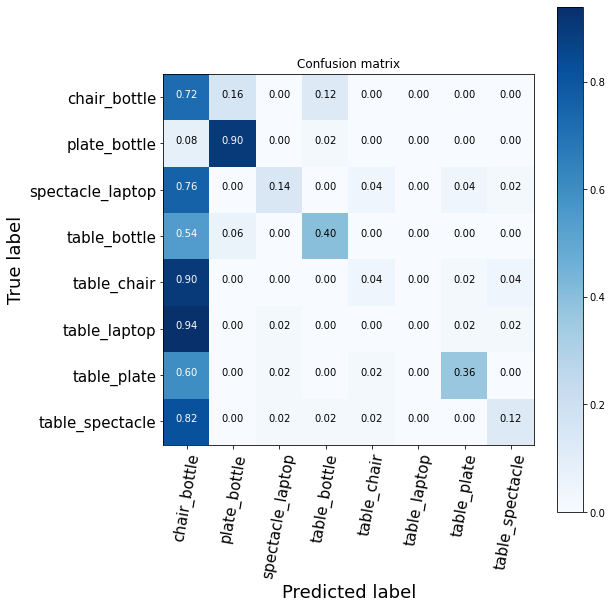

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y1_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.figure(figsize=(8, 8))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
    # Labels, title and ticks
   label_font = {'size':'18'}  # Adjust to fit
   plt.xlabel('Predicted label', fontdict=label_font);
   plt.ylabel('True label', fontdict=label_font);
   plt.tick_params(labelsize = 15) 
   plt.xticks(rotation=80)
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True) 